In [1]:
%matplotlib inline
import numpy as np
import pandas as pd  
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#读入csv文件数据  
df = pd.read_csv('../resource/watermelon3.0alpha.csv')
df['bias'] = np.ones((df.shape[0],1))  
df.head()

,ID,density,Sugar_content,label,bias
0,1,0.697,0.460,1,1.0
1,2,0.774,0.376,1,1.0
2,3,0.634,0.264,1,1.0
3,4,0.608,0.318,1,1.0
4,5,0.556,0.215,1,1.0


In [3]:
dataMat = np.array(df[['density','Sugar_content','bias']].values[:,:])  
labelMat = np.mat(df['label'].values[:]).transpose()  

In [4]:
def sigmoid(z):  
    return 1.0 / (1 + np.exp(-z))  

In [5]:
def LogisticRegression(dataMat,labelMat):  
    m,n = np.shape(dataMat)  
    alpha = 0.1       # 步长
    iterations = 500  # 最大迭代次数
    weights = np.array(np.ones((n,1)))  # 初始权重
  
    # 用梯度上升法更新权重
    for k in range(iterations):   
        z = np.dot(dataMat,weights)  
        h = sigmoid(z)  
        error = (labelMat-h)  
        weights = weights + alpha * np.dot(dataMat.transpose(),error)  
        
    return weights

In [42]:
def DrawResult(weights):  
    m = np.shape(dataMat)[0]  
    xcord1, ycord1, zcord1= [], [], []
    xcord2, ycord2, zcord2= [], [], []
    
    # 按照类别划分数据点
    for i in range(m):  
        if labelMat[i]==1:  
            xcord1.append(dataMat[i,0])  
            ycord1.append(dataMat[i,1]) 
            zcord1.append(1)
        else:  
            xcord2.append(dataMat[i,0])  
            ycord2.append(dataMat[i,1]) 
            zcord2.append(-1)
    
    # 创建三维图表
    fig = plt.figure()  
    ax = Axes3D(fig)
    
    # 画出判决平面
    x = dataMat[:,0]
    y = dataMat[:,1]
    X, Y = np.meshgrid(x, y)
    z = np.array([sigmoid(x*weights[0]+y*weights[1]+weights[2]) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = z.reshape(X.shape)    
    ax.plot_surface(X, Y, Z, rstride=10, cstride=10, color=(0,0.6,0.6,0.1))
    
    # 按类别画出数据点
    ax.scatter(xcord1,ycord1,zcord1,s=30,c='red',marker='H')  
    ax.scatter(xcord2,ycord2,zcord2,s=30,c='green',marker='o') 
    
    ax.set_xlabel('density')  
    ax.set_ylabel('Sugar content')
    ax.set_zlabel('Label')
    plt.title('Gradient ascent logistic regression')
    plt.show()

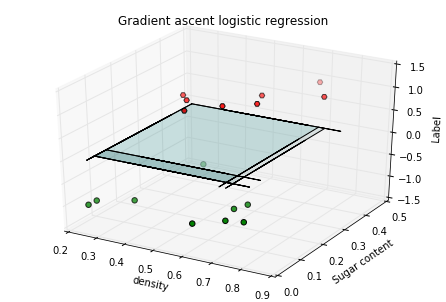

In [43]:
weights = LogisticRegression(dataMat,labelMat)  
DrawResult(weights) 